In [1]:
import shutup; shutup.please()
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
from imputation_utils import char_groupings, char_maps
import numpy as np

# data = np.load('../data/raw_rank_trunk_chars.npz')
data = np.load('../data/raw_chars.npz')
percentile_rank_chars = data['rank_chars']
regular_chars = data['raw_chars']
chars = data['chars']
dates = data['dates']
return_panel = data['returns']
permnos = data['permnos']
rts = data['rfs']
monthly_updates = data['monthly_updates']

from plots_and_tables import section_5

# section 5

## Table 3: Imputation Error for Different Imputation Methods

This table shows imputation RMSE by imputation method averaged over all characteristics and separately for monthly and quarterly updated characteristics. We report the imputation error in-sample evaluated over all observed data, and out-of-sample for masked characteristics from all observed data for the three masking schemes MCAR, Block, and Logit. We report the fallback method in brackets, which is used when a method is not applicable. For example, for missing characteristics of stocks without any prior values, B-XS will be replaced by XS. 

CPU times: user 1.96 s, sys: 2.72 s, total: 4.68 s
Wall time: 2min 57s

In [7]:
%%time 

agg_errorplot = section_5.AggregateImputationErrorsFullDataset()
agg_errorplot.setup(percentile_rank_chars, chars, monthly_updates)
agg_errorplot.run()
agg_errorplot.data_df

\begin{tabular}{lrrrrrr}
\toprule
 & aggregate_out_of_sample_MAR & quarterly_out_of_sample_MAR & monthly_out_of_sample_MAR & aggregate_out_of_sample_block & quarterly_out_of_sample_block & monthly_out_of_sample_block \\
\midrule
cp_pooling_smooth_cma & 0.13 & 0.13 & 0.13 & 0.17 & 0.17 & 0.18 \\
global BF-XS, B-XS, XS & 0.13 & 0.12 & 0.14 & 0.18 & 0.17 & 0.19 \\
local B-XS, XS & 0.15 & 0.14 & 0.16 & 0.19 & 0.19 & 0.20 \\
\bottomrule
\end{tabular}

CPU times: user 560 ms, sys: 271 ms, total: 832 ms
Wall time: 24.7 s


,aggregate_out_of_sample_MAR,quarterly_out_of_sample_MAR,monthly_out_of_sample_MAR,aggregate_out_of_sample_block,quarterly_out_of_sample_block,monthly_out_of_sample_block
cp_pooling_smooth_cma,0.13299,0.13214,0.13454,0.17458,0.17244,0.17848
"global BF-XS, B-XS, XS",0.13135,0.12487,0.14254,0.17797,0.17235,0.18790
"local B-XS, XS",0.14571,0.13987,0.15590,0.19185,0.18621,0.20185


This table shows imputation 𝑅2 by imputation method averaged over all characteristics and separately for monthly and quarterly updated characteristics. We report the imputation error in-sample evaluated over all observed data, and out-of-sample for masked characteristics from all observed data for the three masking schemes MCAR, Block, and Logit. We report the fallback method in brackets, which is
used when a method is not applicable. For example, for missing characteristics of stocks without any prior values, B-XS will be replaced by XS. The 𝑅2 is the explained variation relative to a cross-sectional median imputation.

CPU times: user 2.26 s, sys: 2.31 s, total: 4.57 s
Wall time: 4min 58s

In [2]:
%%time 

agg_r2plot = section_5.AggregateImputationR2FullDataset()
agg_r2plot.setup(percentile_rank_chars, chars, monthly_updates)
agg_r2plot.run()
agg_r2plot.data_df

\begin{tabular}{lrrrrrr}
\toprule
 & aggregate_out_of_sample_MAR & quarterly_out_of_sample_MAR & monthly_out_of_sample_MAR & aggregate_out_of_sample_block & quarterly_out_of_sample_block & monthly_out_of_sample_block \\
\midrule
cp_pooling_smooth_cma & 0.85 & 0.77 & 0.87 & 0.71 & 0.64 & 0.74 \\
global BF-XS, B-XS, XS & 0.80 & 0.79 & 0.79 & 0.59 & 0.64 & 0.57 \\
local B-XS, XS & 0.78 & 0.79 & 0.77 & 0.58 & 0.56 & 0.55 \\
\bottomrule
\end{tabular}

CPU times: user 577 ms, sys: 259 ms, total: 836 ms
Wall time: 13.4 s


,aggregate_out_of_sample_MAR,quarterly_out_of_sample_MAR,monthly_out_of_sample_MAR,aggregate_out_of_sample_block,quarterly_out_of_sample_block,monthly_out_of_sample_block
cp_pooling_smooth_cma,0.84910,0.77307,0.87452,0.70808,0.63655,0.73678
"global BF-XS, B-XS, XS",0.79512,0.78779,0.79203,0.59420,0.63785,0.56566
"local B-XS, XS",0.77818,0.78820,0.77121,0.57527,0.56356,0.54795


## Table 4: Imputation Error for Extreme Characteristic Quintiles

This table shows imputation RMSE by imputation method for different types of missingness for the subset of masked values that are in the first or fifth characteristic quintile. We report the imputation error insample evaluated over all observed data, and out-of-sample for masked characteristics from all observed data for the three masking schemes MCAR, Block, and Logit. We report the fallback method in brackets, which is used when a method is not applicable. For example, for missing characteristics of stocks without any prior values B-XS will be replaced by XS.

CPU times: user 13.9 s, sys: 16.9 s, total: 30.8 s
Wall time: 9min 43s

In [38]:
%%time 

plot = section_5.ImputationErrorsByCharQuintileFullDS()
plot.setup(percentile_rank_chars, chars, monthly_updates)
print(plot.data_df.to_latex())
plot.run()
plot.data_df


\begin{tabular}{lrrrrrrrrr}
\toprule
 & all_out_of_sample_MAR & quarterly_out_of_sample_MAR & monthly_out_of_sample_MAR & all_out_of_sample_block & quarterly_out_of_sample_block & monthly_out_of_sample_block & all_out_of_sample_logit & quarterly_out_of_sample_logit & monthly_out_of_sample_logit \\
\midrule
(1, 'tensor_train_pooling_smooth_all') & 0.207780 & 0.213480 & 0.198000 & 0.255050 & 0.242870 & 0.273660 & 0.252680 & 0.212980 & 0.328210 \\
(1, 'tensor_train_pooling_smooth_all_ema') & 0.186540 & 0.188930 & 0.182500 & 0.249280 & 0.238500 & 0.265830 & 0.244330 & 0.202510 & 0.322560 \\
(1, 'tensor_train_pooling_smooth_all_center_ma') & 0.188910 & 0.191760 & 0.184090 & 0.246330 & 0.233510 & 0.265800 & 0.240130 & 0.198290 & 0.318120 \\
(1, 'tensor_train_pooling_smooth_all_kalman_filter') & 0.187770 & 0.187490 & 0.188230 & 0.239230 & 0.227210 & 0.257550 & 0.241250 & 0.203850 & 0.312590 \\
(1, 'tucker_pooling_smooth_all') & 0.194940 & 0.194520 & 0.195630 & 0.208850 & 0.206020 & 0.213350 &

,all_out_of_sample_MAR,quarterly_out_of_sample_MAR,monthly_out_of_sample_MAR,all_out_of_sample_block,quarterly_out_of_sample_block,monthly_out_of_sample_block,all_out_of_sample_logit,quarterly_out_of_sample_logit,monthly_out_of_sample_logit
"(1, tensor_train_pooling_smooth_all)",0.20778,0.21348,0.19800,0.25505,0.24287,0.27366,0.25268,0.21298,0.32821
"(1, tensor_train_pooling_smooth_all_ema)",0.18654,0.18893,0.18250,0.24928,0.23850,0.26583,0.24433,0.20251,0.32256
"(1, tensor_train_pooling_smooth_all_center_ma)",0.18891,0.19176,0.18409,0.24633,0.23351,0.26580,0.24013,0.19829,0.31812
"(1, tensor_train_pooling_smooth_all_kalman_filter)",0.18777,0.18749,0.18823,0.23923,0.22721,0.25755,0.24125,0.20385,0.31259
"(1, tucker_pooling_smooth_all)",0.19494,0.19452,0.19563,0.20885,0.20602,0.21335,0.22863,0.21277,0.26245
...,...,...,...,...,...,...,...,...,...
"(5, local B-XS, XS)",0.18343,0.18736,0.17654,0.22124,0.21639,0.22917,0.24951,0.21979,0.31046
"(5, local XS)",0.23300,0.22221,0.25031,0.23749,0.23043,0.24889,0.29055,0.27462,0.32627
"(5, local B, median)",0.22259,0.22207,0.22349,0.28360,0.27391,0.29919,0.30455,0.26791,0.37957
"(5, prev val, median)",0.21078,0.20271,0.22387,0.28777,0.27174,0.31286,0.29157,0.24794,0.37763


## Figure 10: Illustrative Model-Implied and Imputed Time-Series

This figure shows illustrative realized and model-implied characteristic time-series for Microsoft and Hasbro. We plot the realized characteristic rank over time, and the model-implied values with the B-XS, BF-XS, and median model. The gray-shaded areas indicate missing blocks of one-year which are not part of the estimation, and, hence, serve as out-of-sample evaluation. We consider Total Assets, Tobin’s Q and Variance, which are three representative characteristics of decreasing persistence.

CPU times: user 1min, sys: 27.5 s, total: 1min 27s
Wall time: 1min 53s

In [4]:
%%time 

plot = section_5.ExampleImputations()
plot.setup(percentile_rank_chars, return_panel, dates, permnos, chars, char_groupings)
plot.run()


UFuncTypeError: ufunc 'floor_divide' cannot use operands with types dtype('<M8[ns]') and dtype('int64')

## Table 5: Imputation Error for Types of Missingness

This table shows imputation RMSE by imputation method for different types of missingness. We report the
imputation error in-sample evaluated over all observed data, and out-of-sample for masked characteristics
from all observed data for the three masking schemes MCAR, Block, and Logit.

CPU times: user 5.27 s, sys: 3.84 s, total: 9.11 s
Wall time: 1min 41s

In [39]:
%%time 

plot = section_5.ImputationErrorsByMissingTypeStart()
plot.setup(percentile_rank_chars, chars, monthly_updates)
plot.run()

\begin{tabular}{lrrrrrrrrr}
\toprule
 & aggregate_out_of_sample_MAR & quarterly_out_of_sample_MAR & monthly_out_of_sample_MAR & aggregate_out_of_sample_block & quarterly_out_of_sample_block & monthly_out_of_sample_block & aggregate_out_of_sample_logit & quarterly_out_of_sample_logit & monthly_out_of_sample_logit \\
\midrule
tensor_train_pooling_smooth_all & 0.24 & 0.22 & 0.26 & 0.25 & 0.23 & 0.29 & 0.28 & 0.26 & 0.30 \\
tensor_train_pooling_smooth_all_ema & 0.25 & 0.22 & 0.27 & 0.25 & 0.23 & 0.28 & 0.28 & 0.27 & 0.30 \\
tensor_train_pooling_smooth_all_center_ma & 0.23 & 0.22 & 0.24 & 0.24 & 0.22 & 0.27 & 0.27 & 0.26 & 0.30 \\
tensor_train_pooling_smooth_all_kalman_filter & 0.22 & 0.21 & 0.24 & 0.24 & 0.22 & 0.26 & 0.27 & 0.26 & 0.29 \\
tucker_pooling_smooth_all & 0.20 & 0.18 & 0.22 & 0.20 & 0.19 & 0.22 & 0.22 & 0.21 & 0.25 \\
tucker_pooling_smooth_all_ema & 0.20 & 0.18 & 0.22 & 0.20 & 0.19 & 0.22 & 0.23 & 0.21 & 0.25 \\
tucker_pooling_smooth_all_center_ma & 0.19 & 0.18 & 0.21 & 0.20 & 

In [42]:
%%time 

plot = section_5.ImputationErrorsByMissingTypeMiddle()
plot.setup(percentile_rank_chars, chars, monthly_updates)
plot.run()

\begin{tabular}{lrrrrrrrrr}
\toprule
 & aggregate_out_of_sample_MAR & quarterly_out_of_sample_MAR & monthly_out_of_sample_MAR & aggregate_out_of_sample_block & quarterly_out_of_sample_block & monthly_out_of_sample_block & aggregate_out_of_sample_logit & quarterly_out_of_sample_logit & monthly_out_of_sample_logit \\
\midrule
tensor_train_pooling_smooth_all & 0.17 & 0.17 & 0.16 & 0.21 & 0.20 & 0.23 & 0.17 & 0.15 & 0.20 \\
tensor_train_pooling_smooth_all_ema & 0.15 & 0.15 & 0.15 & 0.20 & 0.20 & 0.22 & 0.15 & 0.14 & 0.18 \\
tensor_train_pooling_smooth_all_center_ma & 0.15 & 0.15 & 0.15 & 0.20 & 0.19 & 0.22 & 0.14 & 0.13 & 0.17 \\
tensor_train_pooling_smooth_all_kalman_filter & 0.14 & 0.14 & 0.15 & 0.19 & 0.18 & 0.20 & 0.14 & 0.13 & 0.16 \\
tucker_pooling_smooth_all & 0.15 & 0.15 & 0.16 & 0.16 & 0.15 & 0.17 & 0.17 & 0.17 & 0.17 \\
tucker_pooling_smooth_all_ema & 0.14 & 0.13 & 0.15 & 0.15 & 0.15 & 0.17 & 0.15 & 0.14 & 0.16 \\
tucker_pooling_smooth_all_center_ma & 0.14 & 0.13 & 0.14 & 0.15 & 

In [43]:
%%time 

plot = section_5.ImputationErrorsByMissingTypeEnd()
plot.setup(percentile_rank_chars, chars, monthly_updates)
plot.run()

\begin{tabular}{lrrrrrrrrr}
\toprule
 & aggregate_out_of_sample_MAR & quarterly_out_of_sample_MAR & monthly_out_of_sample_MAR & aggregate_out_of_sample_block & quarterly_out_of_sample_block & monthly_out_of_sample_block & aggregate_out_of_sample_logit & quarterly_out_of_sample_logit & monthly_out_of_sample_logit \\
\midrule
tensor_train_pooling_smooth_all & 0.23 & 0.22 & 0.24 & 0.22 & 0.21 & 0.24 & 0.18 & 0.18 & 0.22 \\
tensor_train_pooling_smooth_all_ema & 0.19 & 0.17 & 0.21 & 0.21 & 0.20 & 0.23 & 0.14 & 0.14 & 0.19 \\
tensor_train_pooling_smooth_all_center_ma & 0.21 & 0.20 & 0.23 & 0.22 & 0.20 & 0.24 & 0.17 & 0.17 & 0.21 \\
tensor_train_pooling_smooth_all_kalman_filter & 0.21 & 0.20 & 0.23 & 0.21 & 0.20 & 0.23 & 0.17 & 0.17 & 0.21 \\
tucker_pooling_smooth_all & 0.19 & 0.18 & 0.21 & 0.18 & 0.17 & 0.18 & 0.19 & 0.18 & 0.20 \\
tucker_pooling_smooth_all_ema & 0.17 & 0.15 & 0.19 & 0.17 & 0.17 & 0.18 & 0.15 & 0.15 & 0.18 \\
tucker_pooling_smooth_all_center_ma & 0.18 & 0.17 & 0.20 & 0.17 & 

## Figure 11: Imputation Error for Individual Characteristics

This figure shows the imputation RMSE by imputation method across individual characteristics. The characteristics are sorted in ascending order based on the time-series standard deviation of characteristics. We report the imputation error out-of-sample for masked characteristics from all observed data for the blockmasking scheme. We use the fallback method as indicated in Table 3, when a method is not applicable.

CPU times: user 1min 50s, sys: 32.5 s, total: 2min 22s
Wall time: 3min 44s

<Figure size 640x480 with 0 Axes>

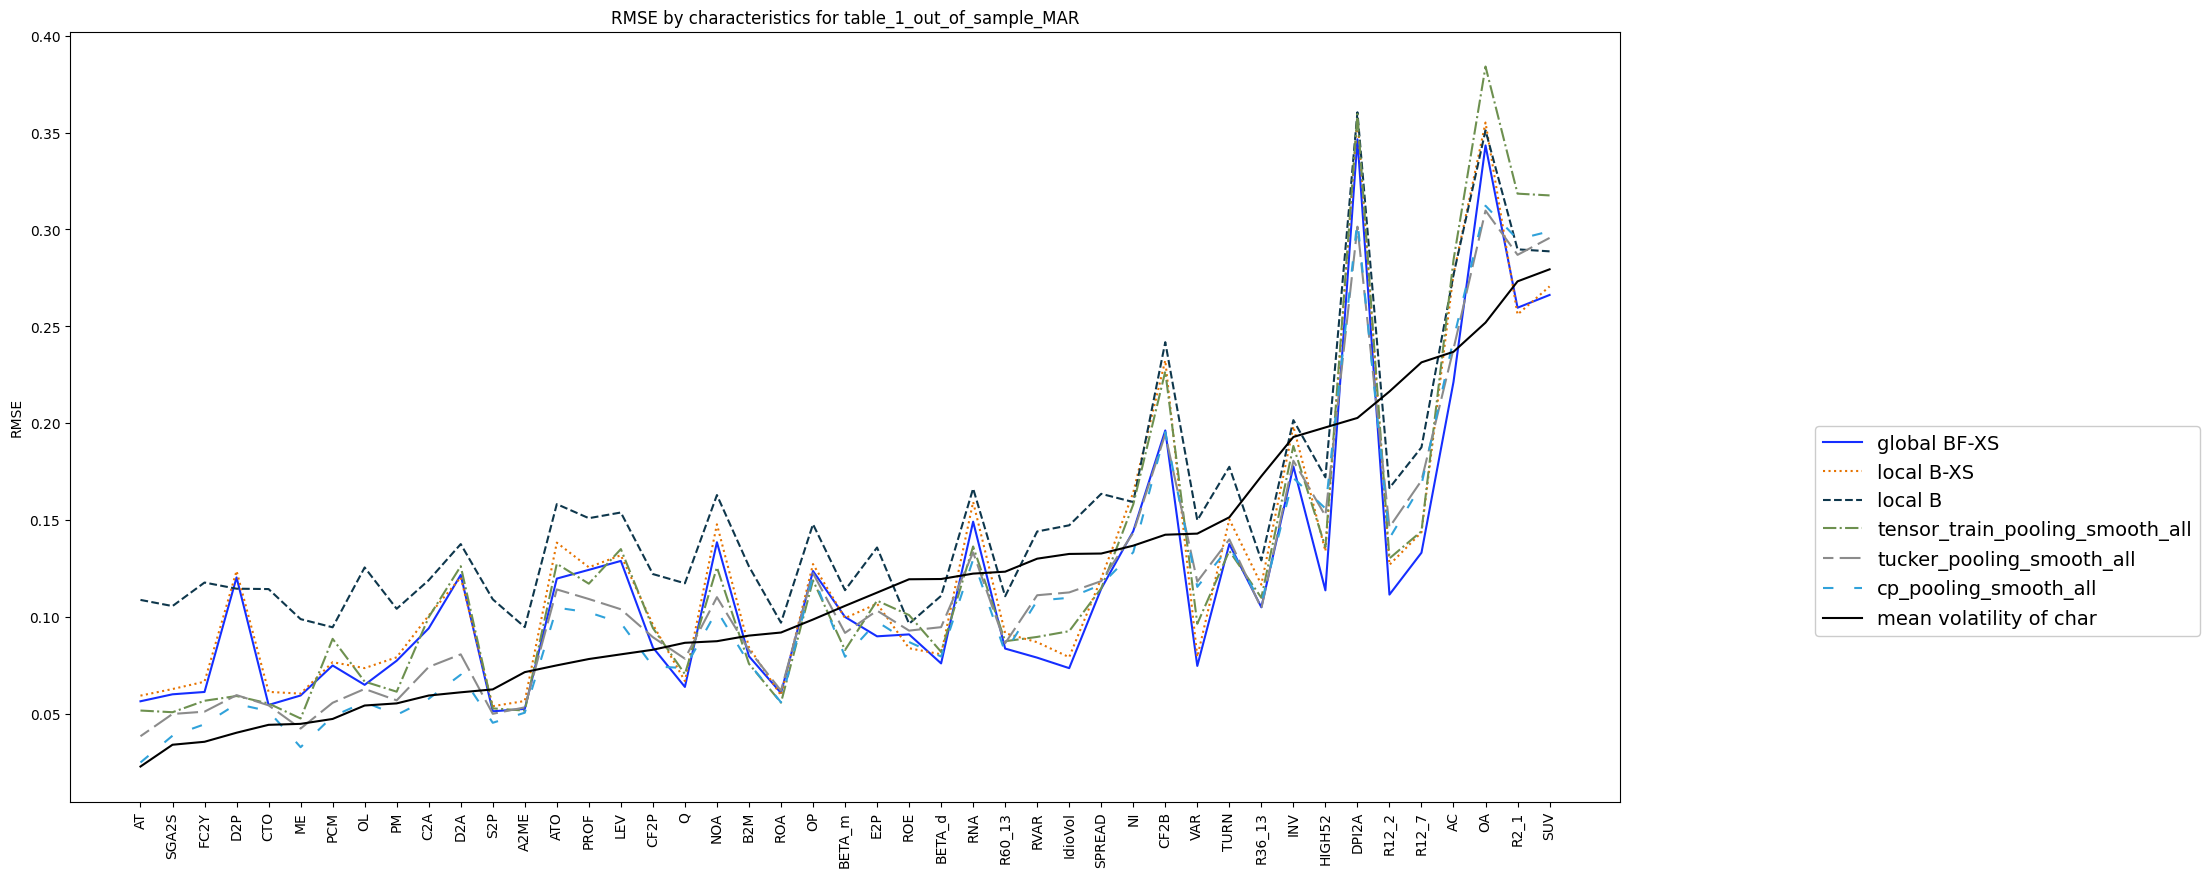

<Figure size 640x480 with 0 Axes>

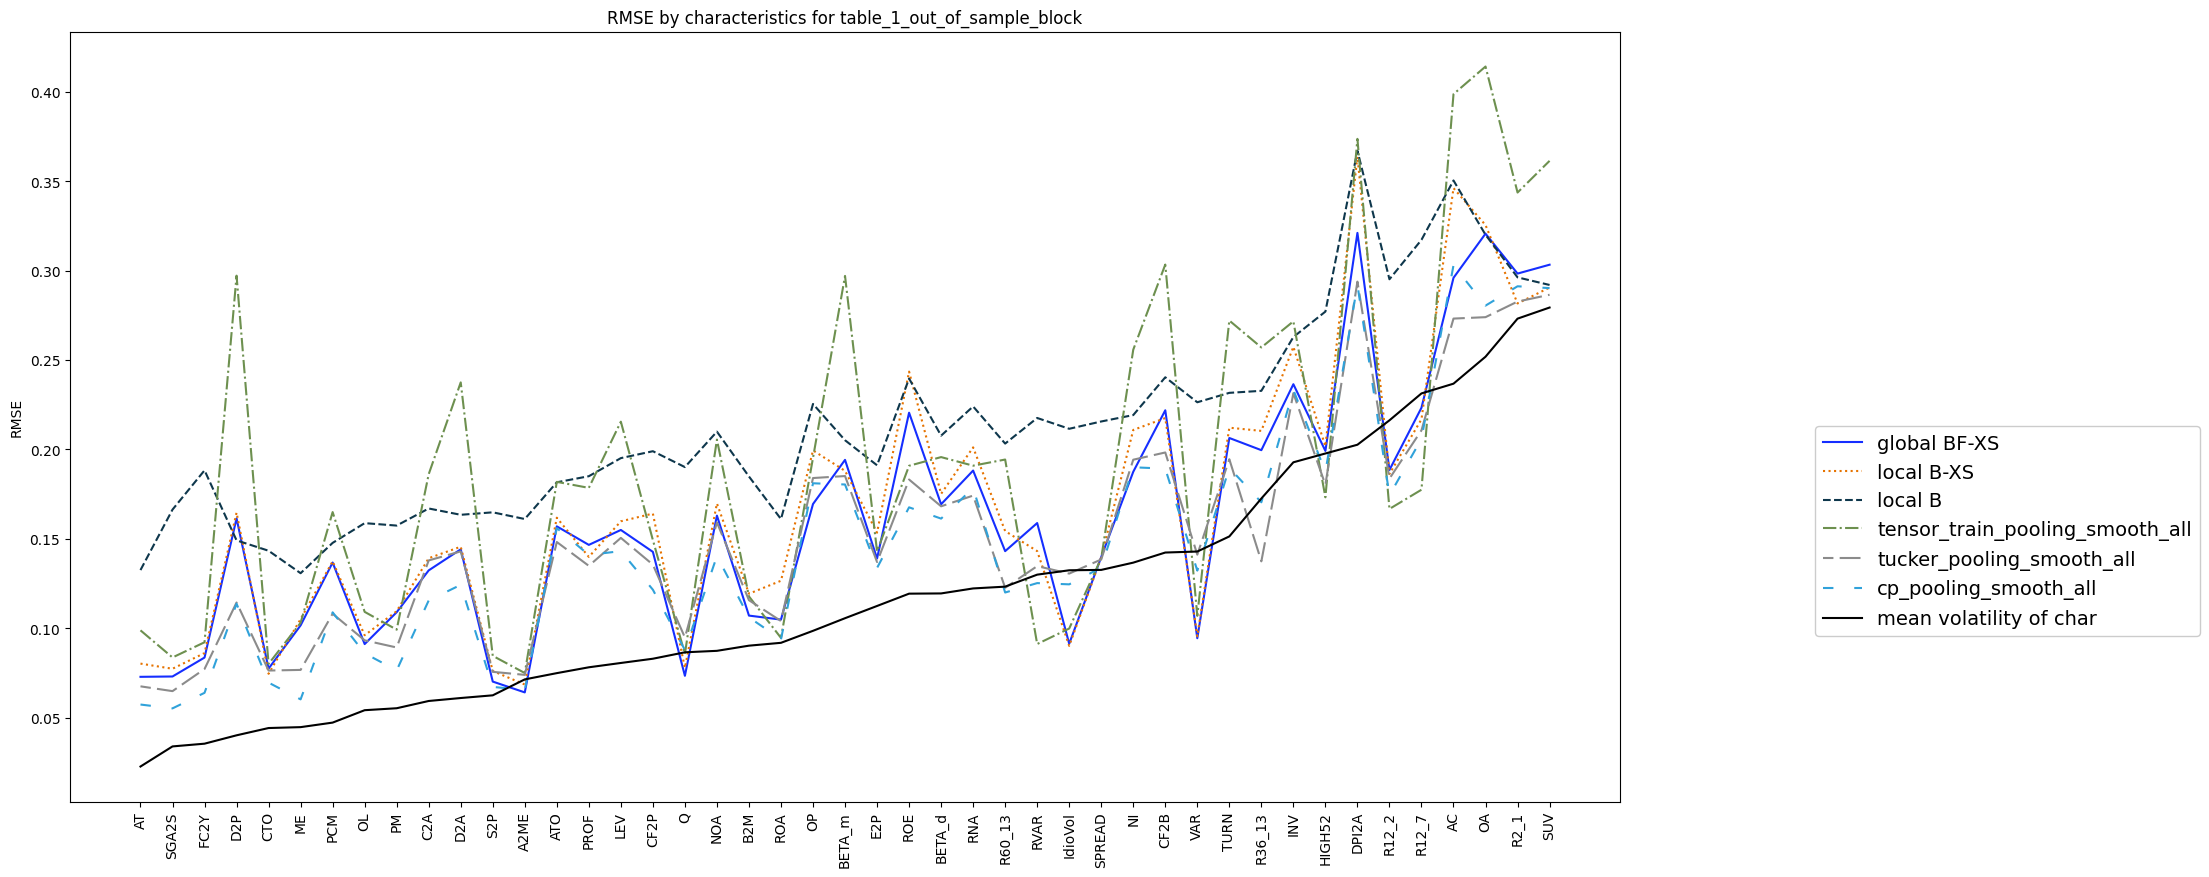

<Figure size 640x480 with 0 Axes>

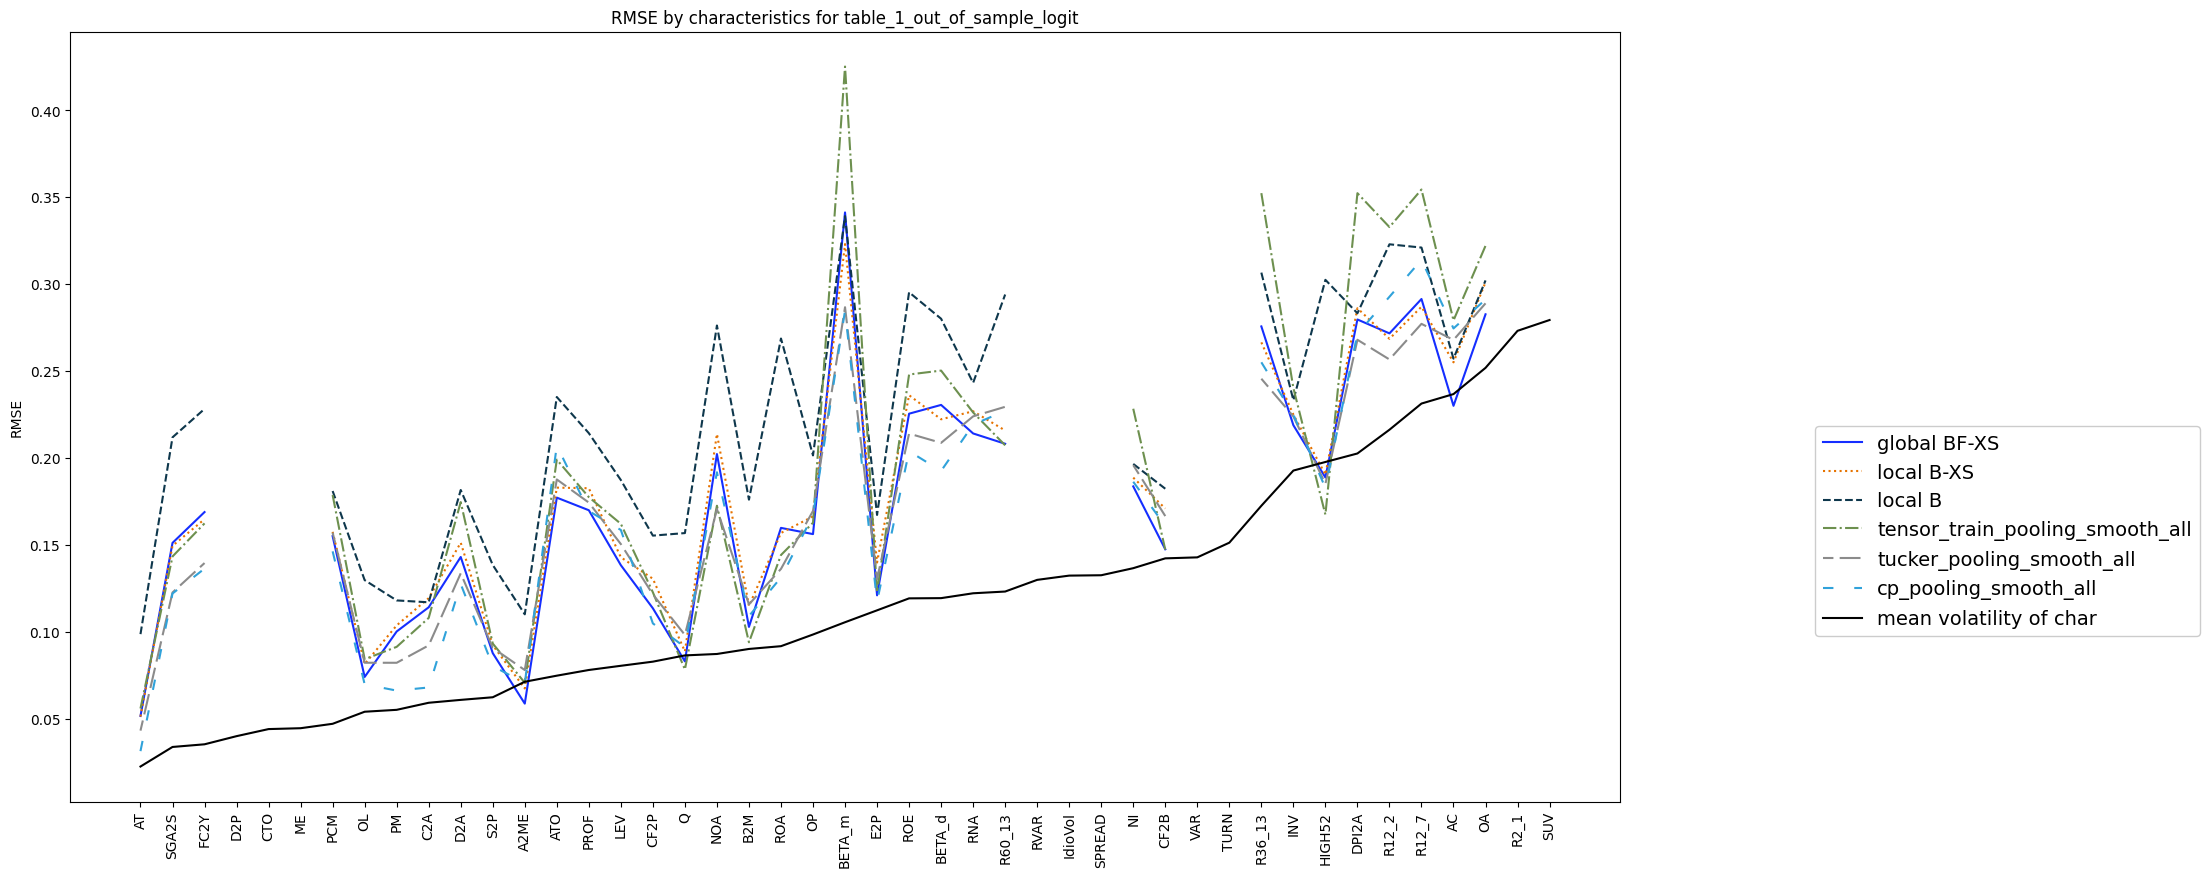

CPU times: user 59.1 s, sys: 24.1 s, total: 1min 23s
Wall time: 1min 24s


In [41]:
%%time 

plot = section_5.ImputationErrorPlots()
plot.setup(percentile_rank_chars, chars, monthly_updates, dates, plot_over_time=False, table_1=True)
plot.run()

## Figure 12: Information Used for Imputation
This figure shows the absolute values of the regression coefficients on the cross-sectional factor model and the time-series information for the global B-XS model. The characteristics are sorted in ascending order based on their autocorrelations.

CPU times: user 56.4 s, sys: 11.7 s, total: 1min 8s
Wall time: 1min 30s

saving to save_loc


<Figure size 640x480 with 0 Axes>

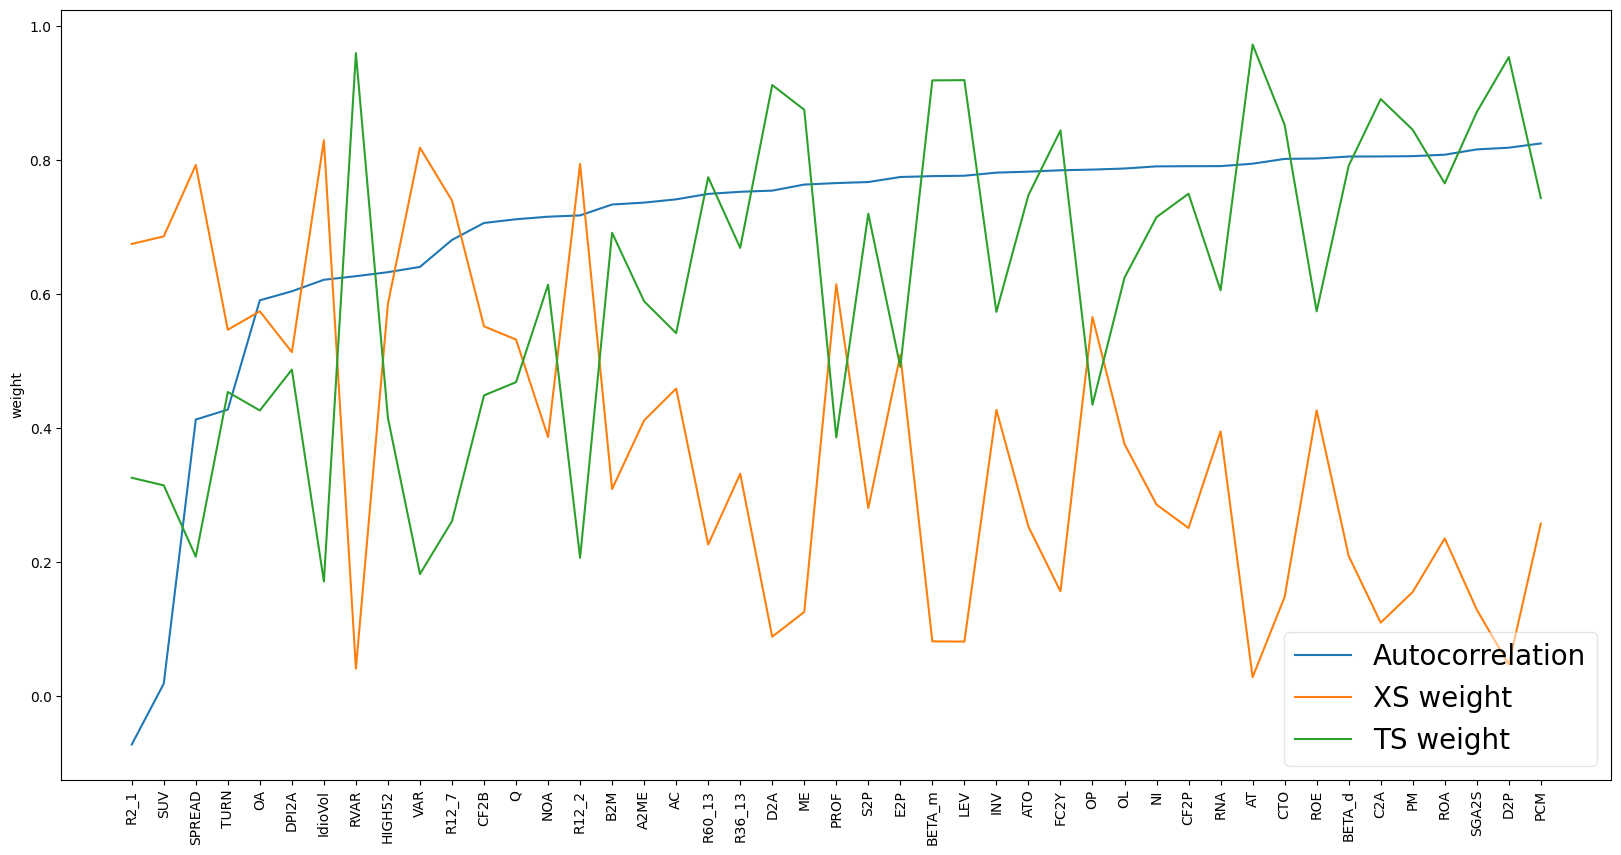

CPU times: user 42.1 s, sys: 34.7 s, total: 1min 16s
Wall time: 37.7 s


In [ ]:
%%time 

plot = section_5.InfoUsedForImputationBW()
plot.setup(percentile_rank_chars, return_panel, chars, monthly_updates, norm_regressors=True)
plot.run()

## Table 6: Imputation Error for Alternative Methods

This table compares the out-of-sample imputation RMSE for alternative imputation methods averaged over all characteristics and separately for monthly and quarterly updated characteristics. We report the errors on the subset of data that are not missing at the beginning, that is, this data has some prior values of the characteristics observed. We compare our benchmark model, local B-XS, with the Expectation Maximization (EM) algorithm suggested by Chen and McCoy (2022) and a cross-sectional regression on the subset of fully observed characteristics (XS reg. fully obs.) suggested by Freyberger et al. (2022).

CPU times: user 4min 19s, sys: 1min 26s, total: 5min 46s
Wall time: 20min 1s

In [ ]:
%%time 

result = section_5.ComparisonWithAlternativeMethods()
result.setup(percentile_rank_chars, return_panel, char_groupings, chars,
        regular_chars, permnos, dates, rts)
display(result.data_df)
result.run()

(60, 22351, 45, 6)
(60, 22351, 45, 6)
(60, 22351, 45, 6)
(60, 22351, 45, 6)


,aggregate-IN SAMPLE,quarterly-IN SAMPLE,monthly-IN SAMPLE,aggregate-MAR,quarterly-MAR,monthly-MAR,aggregate-BLOCK,quarterly-BLOCK,monthly-BLOCK,aggregate-logit,quarterly-logit,monthly-logit
local B-XS,0.09135,0.07576,0.11431,0.13272,0.13702,0.12454,0.16725,0.16411,0.17278,0.13057,0.12840,0.13972
local XS,0.19004,0.18092,0.20554,0.19424,0.18557,0.20904,0.19248,0.18488,0.20553,0.21093,0.21179,0.20705
XS reg. fully obs.,0.23782,0.24932,0.21542,0.25013,0.25208,0.24570,0.25350,0.25664,0.24630,0.27945,0.28120,0.27154
EM,0.00000,0.00000,0.00000,0.16975,0.15946,0.18695,0.16968,0.16171,0.18326,0.18429,0.18406,0.18531


\begin{tabular}{lrrrrrrrrrrrr}
\toprule
 & aggregate-IN SAMPLE & quarterly-IN SAMPLE & monthly-IN SAMPLE & aggregate-MAR & quarterly-MAR & monthly-MAR & aggregate-BLOCK & quarterly-BLOCK & monthly-BLOCK & aggregate-logit & quarterly-logit & monthly-logit \\
\midrule
local B-XS & 0.091 & 0.076 & 0.114 & 0.133 & 0.137 & 0.125 & 0.167 & 0.164 & 0.173 & 0.131 & 0.128 & 0.140 \\
local XS & 0.190 & 0.181 & 0.206 & 0.194 & 0.186 & 0.209 & 0.192 & 0.185 & 0.206 & 0.211 & 0.212 & 0.207 \\
XS reg. fully obs. & 0.238 & 0.249 & 0.215 & 0.250 & 0.252 & 0.246 & 0.254 & 0.257 & 0.246 & 0.279 & 0.281 & 0.272 \\
EM & 0.000 & 0.000 & 0.000 & 0.170 & 0.159 & 0.187 & 0.170 & 0.162 & 0.183 & 0.184 & 0.184 & 0.185 \\
\bottomrule
\end{tabular}

CPU times: user 3min 51s, sys: 1min 23s, total: 5min 14s
Wall time: 47min 30s
